In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df=pd.read_csv('/content/drive/MyDrive/708 course/708 Assessment2/Heart_Disease.csv')

In [4]:
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [5]:
df.shape

(445132, 40)

In [6]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


In [7]:
df.dtypes

,0
State,object
Sex,object
GeneralHealth,object
PhysicalHealthDays,float64
MentalHealthDays,float64
LastCheckupTime,object
PhysicalActivities,object
SleepHours,float64
RemovedTeeth,object
HadHeartAttack,object


In [8]:
# Handle missing values
for col in df.select_dtypes(include=['float', 'int']).columns:
    df[col] = df[col].fillna(df[col].mean())

# For categorical data, fill with 'None'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('None')

# Convert the object type to the category type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      445132 non-null  category
 1   Sex                        445132 non-null  category
 2   GeneralHealth              445132 non-null  category
 3   PhysicalHealthDays         445132 non-null  float64 
 4   MentalHealthDays           445132 non-null  float64 
 5   LastCheckupTime            445132 non-null  category
 6   PhysicalActivities         445132 non-null  category
 7   SleepHours                 445132 non-null  float64 
 8   RemovedTeeth               445132 non-null  category
 9   HadHeartAttack             445132 non-null  category
 10  HadAngina                  445132 non-null  category
 11  HadStroke                  445132 non-null  category
 12  HadAsthma                  445132 non-null  category
 13  HadSkinCancer 

In [9]:
df.duplicated().sum()

157

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.drop('State', axis=1, inplace=True)

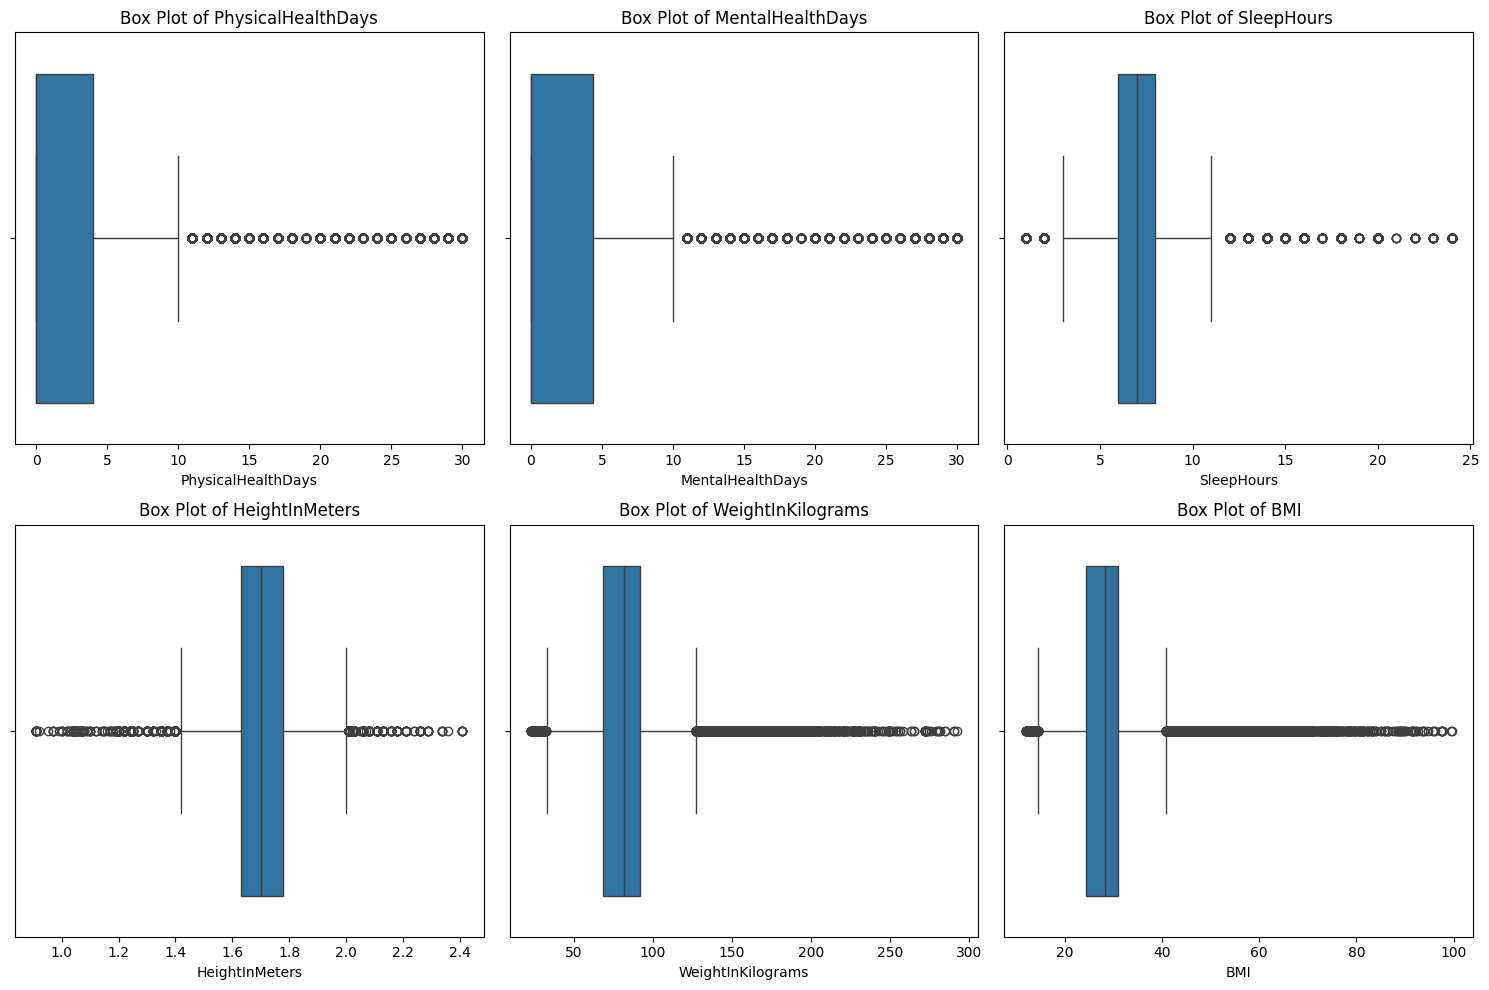

In [12]:
# check outliers for numeric columns
numeric_columns = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
    'HeightInMeters', 'WeightInKilograms', 'BMI'
]

# define the box plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [13]:
# one-hot encoding handling categorical values
categorical_columns = df.select_dtypes(include=['category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_None,...,PneumoVaxEver_Yes,TetanusLast10Tdap_None,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_None,HighRiskLastYear_Yes,CovidPos_None,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,3.0,6.0,1.650000,69.85000,25.630000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
445128,2.0,2.0,7.0,1.700000,83.01000,28.660000,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
445129,30.0,30.0,5.0,1.700000,49.90000,17.230000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
445130,0.0,0.0,5.0,1.830000,108.86000,32.550000,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [14]:
# standardization the dataset
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
df_scaled

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_None,...,PneumoVaxEver_Yes,TetanusLast10Tdap_None,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_None,HighRiskLastYear_Yes,CovidPos_None,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,-0.506759,-0.528039,0.654277,0.000002,-0.000007,-0.000009,-0.941755,-0.395818,-0.690192,-0.051848,...,-0.722020,-0.476615,-0.53819,1.706702,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,-0.576078
1,-0.506759,-0.528039,-0.684958,-0.990380,-0.736534,-0.316821,-0.941755,-0.395818,-0.690192,-0.051848,...,-0.722020,-0.476615,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,-0.576078
2,-0.273731,-0.166709,-1.354576,-1.279710,-0.958945,-0.472007,-0.941755,-0.395818,-0.690192,-0.051848,...,-0.722020,2.098130,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,1.735876
3,-0.506759,-0.528039,-0.015341,-0.508164,-0.958945,-0.845422,-0.941755,-0.395818,-0.690192,-0.051848,...,1.385003,-0.476615,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,-0.576078
4,-0.273731,-0.528039,1.323895,-1.279710,-1.425322,-1.092749,-0.941755,2.526417,-0.690192,-0.051848,...,1.385003,-0.476615,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,-0.576078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444970,-0.506759,-0.166709,-0.684958,-0.508164,-0.647864,-0.468774,-0.941755,-0.395818,1.448872,-0.051848,...,-0.722020,-0.476615,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,1.735876
444971,-0.273731,-0.287152,-0.015341,-0.025947,-0.003166,0.021031,-0.941755,-0.395818,-0.690192,-0.051848,...,-0.722020,-0.476615,-0.53819,1.706702,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,-0.576078
444972,2.988666,3.085255,-1.354576,-0.025947,-1.625198,-1.826648,-0.941755,-0.395818,-0.690192,-0.051848,...,-0.722020,-0.476615,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,-0.576078
444973,-0.506759,-0.528039,-1.354576,1.227816,1.263206,0.649856,1.061847,-0.395818,-0.690192,-0.051848,...,1.385003,-0.476615,-0.53819,-0.585925,-0.256432,-0.357704,-0.200428,-0.358268,-0.176451,1.735876


In [15]:
# check all the columns after one hot encoding
columns_list = df_scaled.columns.tolist()
for column in columns_list:
    print(column)

PhysicalHealthDays
MentalHealthDays
SleepHours
HeightInMeters
WeightInKilograms
BMI
Sex_Male
GeneralHealth_Fair
GeneralHealth_Good
GeneralHealth_None
GeneralHealth_Poor
GeneralHealth_Very good
LastCheckupTime_None
LastCheckupTime_Within past 2 years (1 year but less than 2 years ago)
LastCheckupTime_Within past 5 years (2 years but less than 5 years ago)
LastCheckupTime_Within past year (anytime less than 12 months ago)
PhysicalActivities_None
PhysicalActivities_Yes
RemovedTeeth_6 or more, but not all
RemovedTeeth_All
RemovedTeeth_None
RemovedTeeth_None of them
HadHeartAttack_None
HadHeartAttack_Yes
HadAngina_None
HadAngina_Yes
HadStroke_None
HadStroke_Yes
HadAsthma_None
HadAsthma_Yes
HadSkinCancer_None
HadSkinCancer_Yes
HadCOPD_None
HadCOPD_Yes
HadDepressiveDisorder_None
HadDepressiveDisorder_Yes
HadKidneyDisease_None
HadKidneyDisease_Yes
HadArthritis_None
HadArthritis_Yes
HadDiabetes_No, pre-diabetes or borderline diabetes
HadDiabetes_None
HadDiabetes_Yes
HadDiabetes_Yes, but only du

In [16]:
# Find the column name that contains a particular pattern '_None'
columns_to_drop = [col for col in df_scaled.columns if '_None' in col]
# delete the columns
df_scaled.drop(columns=columns_to_drop, inplace=True)
df_scaled

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,...,AlcoholDrinkers_Yes,HIVTesting_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,-0.506759,-0.528039,0.654277,0.000002,-0.000007,-0.000009,-0.941755,-0.395818,-0.690192,-0.215462,...,-0.949125,-0.639242,1.061397,-0.722020,-0.53819,1.706702,-0.256432,-0.200428,-0.176451,-0.576078
1,-0.506759,-0.528039,-0.684958,-0.990380,-0.736534,-0.316821,-0.941755,-0.395818,-0.690192,-0.215462,...,-0.949125,-0.639242,-0.942154,-0.722020,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,-0.576078
2,-0.273731,-0.166709,-1.354576,-1.279710,-0.958945,-0.472007,-0.941755,-0.395818,-0.690192,-0.215462,...,-0.949125,-0.639242,-0.942154,-0.722020,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,1.735876
3,-0.506759,-0.528039,-0.015341,-0.508164,-0.958945,-0.845422,-0.941755,-0.395818,-0.690192,-0.215462,...,-0.949125,-0.639242,1.061397,1.385003,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,-0.576078
4,-0.273731,-0.528039,1.323895,-1.279710,-1.425322,-1.092749,-0.941755,2.526417,-0.690192,-0.215462,...,1.053602,-0.639242,-0.942154,1.385003,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,-0.576078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444970,-0.506759,-0.166709,-0.684958,-0.508164,-0.647864,-0.468774,-0.941755,-0.395818,1.448872,-0.215462,...,-0.949125,1.564353,-0.942154,-0.722020,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,1.735876
444971,-0.273731,-0.287152,-0.015341,-0.025947,-0.003166,0.021031,-0.941755,-0.395818,-0.690192,-0.215462,...,-0.949125,1.564353,1.061397,-0.722020,-0.53819,1.706702,-0.256432,-0.200428,-0.176451,-0.576078
444972,2.988666,3.085255,-1.354576,-0.025947,-1.625198,-1.826648,-0.941755,-0.395818,-0.690192,4.641191,...,-0.949125,-0.639242,-0.942154,-0.722020,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,-0.576078
444973,-0.506759,-0.528039,-1.354576,1.227816,1.263206,0.649856,1.061847,-0.395818,-0.690192,-0.215462,...,-0.949125,1.564353,1.061397,1.385003,-0.53819,-0.585925,-0.256432,-0.200428,-0.176451,1.735876


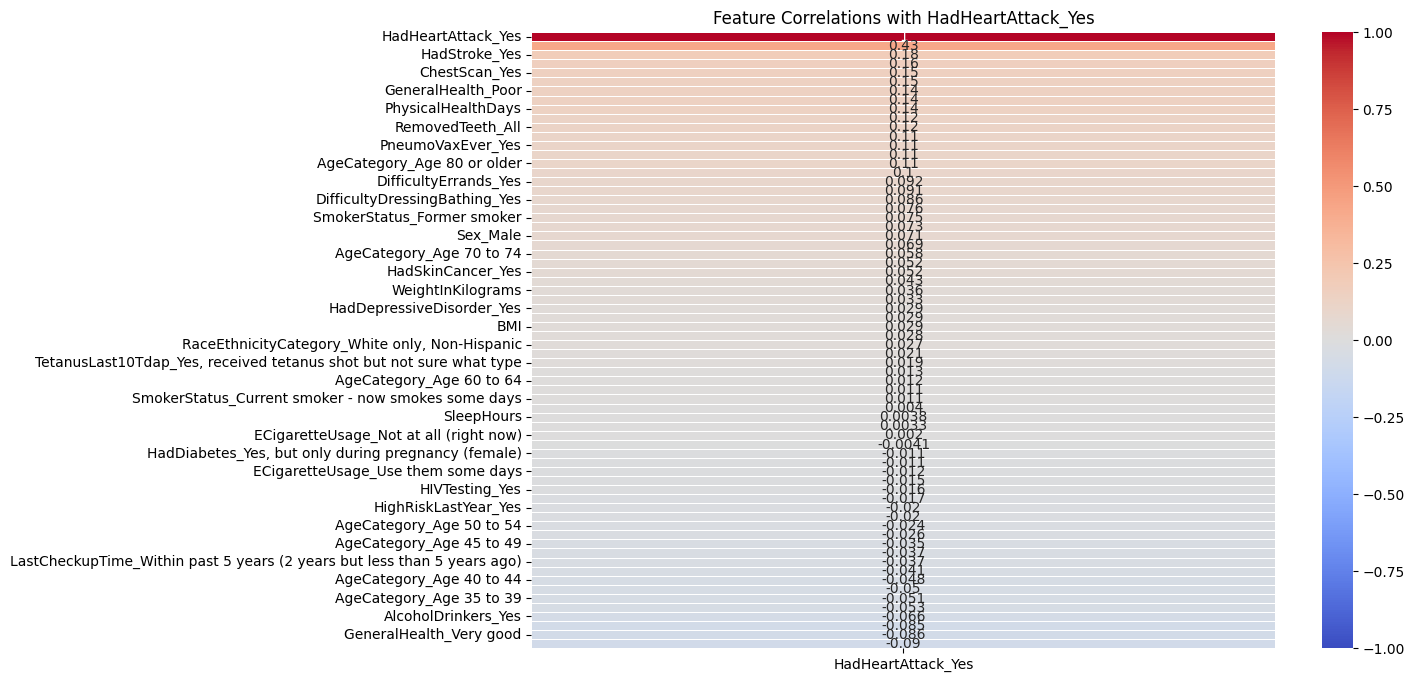

In [17]:
# correlation matrix
corr_matrix = df_scaled.corr()
target_corr = corr_matrix['HadHeartAttack_Yes'].sort_values(ascending=False)

# visualization
plt.figure(figsize=(12, 8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='white')
plt.title('Feature Correlations with HadHeartAttack_Yes')
plt.show()

In [18]:
# split the dataset and drop the 2 columns related to had heart attack
X = df_scaled.drop(columns=['HadHeartAttack_Yes'])
y = df_scaled['HadHeartAttack_Yes']

In [19]:
print(y.value_counts())
print(y.dtype)

HadHeartAttack_Yes
-0.244540    419867
 4.089308     25108
Name: count, dtype: int64
float64


In [20]:
# convert values to binary classes
y = (df_scaled['HadHeartAttack_Yes'] > 0).astype(int)
print(y.value_counts())
print(y.dtype)

HadHeartAttack_Yes
0    419867
1     25108
Name: count, dtype: int64
int64


In [21]:
# define test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Logistic Regression model
# Train and evaluate Logistic Regression model
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, logistic_predictions))

# Random Forest model
# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy Score:", accuracy_score(y_test, rf_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     83973
           1       0.56      0.23      0.33      5022

    accuracy                           0.95     88995
   macro avg       0.76      0.61      0.65     88995
weighted avg       0.93      0.95      0.94     88995

Logistic Regression Accuracy Score: 0.94641271981572
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     83973
           1       0.59      0.14      0.23      5022

    accuracy                           0.95     88995
   macro avg       0.77      0.57      0.60     88995
weighted avg       0.93      0.95      0.93     88995

Random Forest Accuracy Score: 0.9461542783302432


In [23]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['saga'],
    'max_iter': [100, 500, 1000]
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.9465953143435024


In [24]:
# Define the Logistic Regression model with the best parameters
best_params = {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
logistic_model = LogisticRegression(**best_params)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, logistic_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     83973
           1       0.56      0.23      0.32      5022

    accuracy                           0.95     88995
   macro avg       0.76      0.61      0.65     88995
weighted avg       0.93      0.95      0.94     88995

Logistic Regression Accuracy Score: 0.9463677734704197


In [25]:
# check overfitting
# Evaluate on the training set
train_predictions = logistic_model.predict(X_train)
print("Logistic Regression Training Classification Report:")
print(classification_report(y_train, train_predictions))
print("Logistic Regression Training Accuracy Score:", accuracy_score(y_train, train_predictions))

# Evaluate on the test set
test_predictions = logistic_model.predict(X_test)
print("Logistic Regression Test Classification Report:")
print(classification_report(y_test, test_predictions))
print("Logistic Regression Test Accuracy Score:", accuracy_score(y_test, test_predictions))


Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    335894
           1       0.57      0.23      0.33     20086

    accuracy                           0.95    355980
   macro avg       0.76      0.61      0.65    355980
weighted avg       0.93      0.95      0.94    355980

Logistic Regression Training Accuracy Score: 0.9466543064217091
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     83973
           1       0.56      0.23      0.32      5022

    accuracy                           0.95     88995
   macro avg       0.76      0.61      0.65     88995
weighted avg       0.93      0.95      0.94     88995

Logistic Regression Test Accuracy Score: 0.9463677734704197


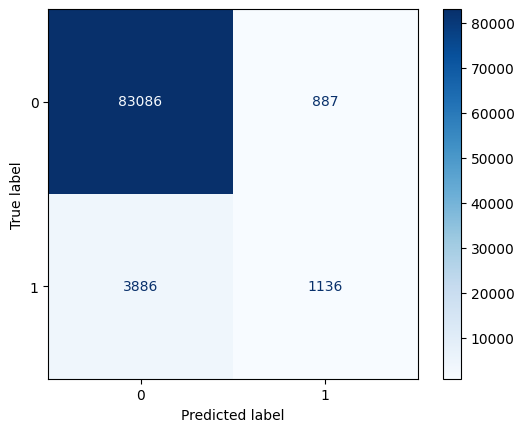

Confusion Matrix:
[[83086   887]
 [ 3886  1136]]


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

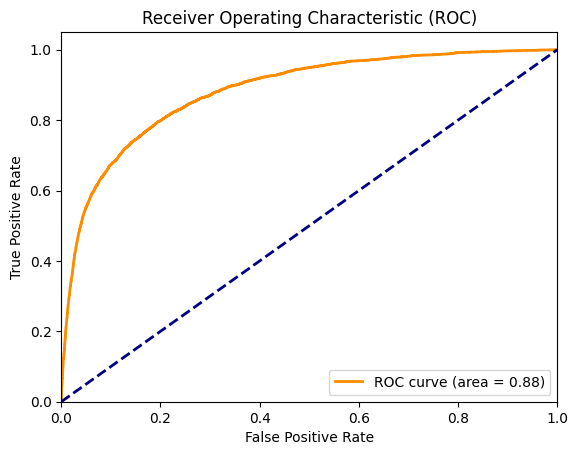

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Define the best hyperparameters
best_params = {
    'C': 0.01,
    'max_iter': 100,
    'penalty': 'l1',
    'solver': 'saga'
}

# Create an instance of the Logistic Regression model with the best parameters
logistic_model = LogisticRegression(**best_params)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores and classification reports
fold_scores = []

# Perform KFold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X), start=1):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]
    # Train the model
    logistic_model.fit(X_train_kf, y_train_kf)
    # Make predictions on the validation set
    y_val_pred = logistic_model.predict(X_val_kf)
    # Compute and store accuracy
    fold_accuracy = accuracy_score(y_val_kf, y_val_pred)
    fold_scores.append(fold_accuracy)

# Print accuracy for each fold
for fold, score in enumerate(fold_scores, start=1):
    print(f"Fold {fold} Accuracy: {score:.4f}")

# Find the best fold
best_fold = np.argmax(fold_scores) + 1
best_accuracy = np.max(fold_scores)

# Print classification report for the best fold
print(f"\nBest Fold: {best_fold} with Accuracy: {best_accuracy:.4f}")

Fold 1 Accuracy: 0.9464
Fold 2 Accuracy: 0.9463
Fold 3 Accuracy: 0.9472
Fold 4 Accuracy: 0.9461
Fold 5 Accuracy: 0.9472

Best Fold: 5 with Accuracy: 0.9472


In [29]:
# Get the training and validation indices for the best fold
best_fold_index = np.argmax(fold_scores) + 1
best_train_index, best_val_index = list(kf.split(X))[best_fold_index - 1]
X_train_best_fold, X_val_best_fold = X.iloc[best_train_index], X.iloc[best_val_index]
y_train_best_fold, y_val_best_fold = y.iloc[best_train_index], y.iloc[best_val_index]

# Train the final model with the best parameters on the best fold's training data
final_model = LogisticRegression(**best_params)
final_model.fit(X_train_best_fold, y_train_best_fold)

# Make predictions on the validation set from the best fold
y_val_pred_best_fold = final_model.predict(X_val_best_fold)

# Evaluate the final model
print("Final Model Classification Report on Best Fold Validation Set:")
print(classification_report(y_val_best_fold, y_val_pred_best_fold))
print("Final Model Accuracy Score on Best Fold Validation Set:", accuracy_score(y_val_best_fold, y_val_pred_best_fold))

Final Model Classification Report on Best Fold Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     84009
           1       0.57      0.23      0.33      4986

    accuracy                           0.95     88995
   macro avg       0.76      0.61      0.65     88995
weighted avg       0.93      0.95      0.94     88995

Final Model Accuracy Score on Best Fold Validation Set: 0.9471655710995


In [30]:
# Get the feature names from the model
feature_names = X.columns

# Get the coefficients from the trained model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients
features_df['Absolute_Coefficient'] = features_df['Coefficient'].abs()
features_df_sorted = features_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the top 20 features with the highest absolute coefficients
print("Top 20 Features by Absolute Coefficient:")
print(features_df_sorted.head(20))

Top 20 Features by Absolute Coefficient:
                        Feature  Coefficient  Absolute_Coefficient
17                HadAngina_Yes     0.554551              0.554551
6                      Sex_Male     0.330063              0.330063
56  AgeCategory_Age 80 or older     0.275625              0.275625
40                ChestScan_Yes     0.230585              0.230585
7            GeneralHealth_Fair     0.225914              0.225914
54     AgeCategory_Age 70 to 74     0.216979              0.216979
55     AgeCategory_Age 75 to 79     0.214858              0.214858
36    SmokerStatus_Never smoked    -0.207005              0.207005
8            GeneralHealth_Good     0.195141              0.195141
53     AgeCategory_Age 65 to 69     0.190350              0.190350
18                HadStroke_Yes     0.188398              0.188398
45     AgeCategory_Age 25 to 29    -0.169018              0.169018
9            GeneralHealth_Poor     0.164240              0.164240
52     AgeCategory_Ag